# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!pip install citipy
!jupyter nbextension enable --py --sys-prefix citipy

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


Traceback (most recent call last):
  File "C:\Users\megam\Anaconda3\envs\PythonData\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\jupyter_core\application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\notebook\nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\jupyter_core\application.py", line 256, in start
    self.subapp.start()
  File "C:\Users\megam\Anaconda3\envs\PythonData\lib\site-packages\notebook\nbextensions.py", line 896, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "C:\Users\megam\Anacond

In [85]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import? API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [86]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

cities_list = pd.DataFrame(cities)

cities_df = pd.DataFrame(columns = ['City', 'Cloudiness', 'Country', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed']) 

cities_df
# cities_df["Cloudiness"] = []
# cities_df["Country"] = []
# cities_df["Humidity"] = []
# cities_df["Lat"] = []
# cities_df["Lon"] = []
# cities_df["Max Temp"] = []
# cities_df["Wind Speed"] = []

        
# Print the city count to confirm sufficient count
# len(cities)

,City,Cloudiness,Country,Humidity,Lat,Lon,Max Temp,Wind Speed


In [80]:
# cities_list

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [88]:
### Find out how to retrieve specific weather info FOR WEATHERMAPY
# base_url = "http://api.openweathermap.org/?"
# params = {
#     "q": cities,
#     "APPID": api_key,
# }

# request = requests.get(base_url, params).json()


######

# use iterrows to iterate through pandas dataframe
for index, row in cities_list.iterrows():

    random_city = np.random.choice(cities, 1)

    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    params = {
        "q": random_city,
        "APPID": api_key,
    }


    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {random_city}.")
    response = requests.get(base_url, params).json()
    
#     print(json.dumps(response, indent=4))

    # extract results
#     results = response['results']
    
    try:
        print(f"Randomly found a city : {response['name']}.")
        
        cities_df.loc[index, 'City'] = response['name']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lon'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
        
    print("------------")


Retrieving Results for Index 0: ['iqaluit'].
Randomly found a city : Iqaluit.
------------
Retrieving Results for Index 1: ['ginda'].
Randomly found a city : Ginda.
------------
Retrieving Results for Index 2: ['bembibre'].
Randomly found a city : Bembibre.
------------
Retrieving Results for Index 3: ['aykhal'].
Randomly found a city : Aykhal.
------------
Retrieving Results for Index 4: ['prachuap khiri khan'].
Randomly found a city : Prachuap Khiri Khan.
------------
Retrieving Results for Index 5: ['kununurra'].
Randomly found a city : Kununurra.
------------
Retrieving Results for Index 6: ['balagansk'].
Randomly found a city : Balagansk.
------------
Retrieving Results for Index 7: ['saint anthony'].
Randomly found a city : Saint Anthony.
------------
Retrieving Results for Index 8: ['bolungarvik'].
Missing field/result... skipping.
------------
Retrieving Results for Index 9: ['chuy'].
Randomly found a city : Chuy.
------------
Retrieving Results for Index 10: ['atuona'].
Random

Randomly found a city : Emerald.
------------
Retrieving Results for Index 87: ['dalbandin'].
Randomly found a city : Dalbandin.
------------
Retrieving Results for Index 88: ['kovur'].
Randomly found a city : Kovur.
------------
Retrieving Results for Index 89: ['babanusah'].
Missing field/result... skipping.
------------
Retrieving Results for Index 90: ['urdzhar'].
Missing field/result... skipping.
------------
Retrieving Results for Index 91: ['azimur'].
Missing field/result... skipping.
------------
Retrieving Results for Index 92: ['albany'].
Randomly found a city : Albany.
------------
Retrieving Results for Index 93: ['balkanabat'].
Randomly found a city : Balkanabat.
------------
Retrieving Results for Index 94: ['paysandu'].
Randomly found a city : Paysandu.
------------
Retrieving Results for Index 95: ['magdalena'].
Randomly found a city : Magdalena.
------------
Retrieving Results for Index 96: ['ramsar'].
Randomly found a city : Ramsar.
------------
Retrieving Results for

Randomly found a city : Flin Flon.
------------
Retrieving Results for Index 173: ['komsomolskiy'].
Randomly found a city : Komsomolskiy.
------------
Retrieving Results for Index 174: ['barcelona'].
Randomly found a city : Barcelona.
------------
Retrieving Results for Index 175: ['nibbar'].
Randomly found a city : Nibbar.
------------
Retrieving Results for Index 176: ['virginia beach'].
Randomly found a city : Virginia Beach.
------------
Retrieving Results for Index 177: ['illoqqortoormiut'].
Missing field/result... skipping.
------------
Retrieving Results for Index 178: ['evensk'].
Randomly found a city : Evensk.
------------
Retrieving Results for Index 179: ['minas de barroteran'].
Randomly found a city : Minas de Barroteran.
------------
Retrieving Results for Index 180: ['hun'].
Randomly found a city : Hun.
------------
Retrieving Results for Index 181: ['coihaique'].
Randomly found a city : Coihaique.
------------
Retrieving Results for Index 182: ['sentyabrskiy'].
Missing f

Randomly found a city : La Paz.
------------
Retrieving Results for Index 259: ['geraldton'].
Randomly found a city : Geraldton.
------------
Retrieving Results for Index 260: ['itoman'].
Randomly found a city : Itoman.
------------
Retrieving Results for Index 261: ['klaksvik'].
Randomly found a city : Klaksvik.
------------
Retrieving Results for Index 262: ['rio grande'].
Randomly found a city : Rio Grande.
------------
Retrieving Results for Index 263: ['illoqqortoormiut'].
Missing field/result... skipping.
------------
Retrieving Results for Index 264: ['oriximina'].
Randomly found a city : Oriximina.
------------
Retrieving Results for Index 265: ['brae'].
Randomly found a city : Brae.
------------
Retrieving Results for Index 266: ['anadyr'].
Randomly found a city : Anadyr.
------------
Retrieving Results for Index 267: ['upernavik'].
Randomly found a city : Upernavik.
------------
Retrieving Results for Index 268: ['hay river'].
Randomly found a city : Hay River.
------------
R

Randomly found a city : Orotukan.
------------
Retrieving Results for Index 344: ['pahrump'].
Randomly found a city : Pahrump.
------------
Retrieving Results for Index 345: ['atambua'].
Randomly found a city : Atambua.
------------
Retrieving Results for Index 346: ['dalbandin'].
Randomly found a city : Dalbandin.
------------
Retrieving Results for Index 347: ['ankpa'].
Randomly found a city : Ankpa.
------------
Retrieving Results for Index 348: ['kargopol'].
Randomly found a city : Kargopol.
------------
Retrieving Results for Index 349: ['fayaoue'].
Randomly found a city : Fayaoue.
------------
Retrieving Results for Index 350: ['goundi'].
Randomly found a city : Goundi.
------------
Retrieving Results for Index 351: ['trincomalee'].
Randomly found a city : Trincomalee.
------------
Retrieving Results for Index 352: ['inirida'].
Randomly found a city : Inirida.
------------
Retrieving Results for Index 353: ['ruatoria'].
Missing field/result... skipping.
------------
Retrieving Re

Randomly found a city : Whitianga.
------------
Retrieving Results for Index 429: ['irbeyskoye'].
Randomly found a city : Irbeyskoye.
------------
Retrieving Results for Index 430: ['meulaboh'].
Randomly found a city : Meulaboh.
------------
Retrieving Results for Index 431: ['gornopravdinsk'].
Randomly found a city : Gornopravdinsk.
------------
Retrieving Results for Index 432: ['mount gambier'].
Randomly found a city : Mount Gambier.
------------
Retrieving Results for Index 433: ['aykhal'].
Randomly found a city : Aykhal.
------------
Retrieving Results for Index 434: ['kahului'].
Randomly found a city : Kahului.
------------
Retrieving Results for Index 435: ['yulara'].
Randomly found a city : Yulara.
------------
Retrieving Results for Index 436: ['geraldton'].
Randomly found a city : Geraldton.
------------
Retrieving Results for Index 437: ['port alfred'].
Randomly found a city : Port Alfred.
------------
Retrieving Results for Index 438: ['san carlos de bariloche'].
Randomly f

Randomly found a city : Lagoa.
------------
Retrieving Results for Index 515: ['mitsamiouli'].
Randomly found a city : Mitsamiouli.
------------
Retrieving Results for Index 516: ['juneau'].
Randomly found a city : Juneau.
------------
Retrieving Results for Index 517: ['vila franca do campo'].
Randomly found a city : Vila Franca do Campo.
------------
Retrieving Results for Index 518: ['ati'].
Randomly found a city : Ati.
------------
Retrieving Results for Index 519: ['quevedo'].
Randomly found a city : Quevedo.
------------
Retrieving Results for Index 520: ['necochea'].
Randomly found a city : Necochea.
------------
Retrieving Results for Index 521: ['green river'].
Randomly found a city : Green River.
------------
Retrieving Results for Index 522: ['byron bay'].
Randomly found a city : Byron Bay.
------------
Retrieving Results for Index 523: ['cherskiy'].
Randomly found a city : Cherskiy.
------------
Retrieving Results for Index 524: ['batak'].
Randomly found a city : Batak.
---

Randomly found a city : Labuhan.
------------
Retrieving Results for Index 601: ['kamenka'].
Randomly found a city : Kamenka.
------------
Retrieving Results for Index 602: ['rundu'].
Randomly found a city : Rundu.
------------
Retrieving Results for Index 603: ['balaipungut'].
Randomly found a city : Balaipungut.
------------
Retrieving Results for Index 604: ['dicabisagan'].
Randomly found a city : Dicabisagan.
------------
Retrieving Results for Index 605: ['taolanaro'].
Missing field/result... skipping.
------------
Retrieving Results for Index 606: ['susangerd'].
Randomly found a city : Susangerd.
------------
Retrieving Results for Index 607: ['mar del plata'].
Randomly found a city : Mar del Plata.
------------
Retrieving Results for Index 608: ['broome'].
Randomly found a city : Broome.
------------
Retrieving Results for Index 609: ['whitehorse'].
Randomly found a city : Whitehorse.
------------
Retrieving Results for Index 610: ['vila franca do campo'].
Randomly found a city 

In [68]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    "q": cities[1],
    "APPID": api_key,
}

request = requests.get(base_url, params).json()

print(json.dumps(request, indent=4))

{
    "coord": {
        "lon": -73.48,
        "lat": 45.36
    },
    "weather": [
        {
            "id": 802,
            "main": "Clouds",
            "description": "scattered clouds",
            "icon": "03d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 283.97,
        "pressure": 1017,
        "humidity": 66,
        "temp_min": 282.59,
        "temp_max": 285.37
    },
    "visibility": 16093,
    "wind": {
        "speed": 2.6,
        "deg": 30
    },
    "clouds": {
        "all": 40
    },
    "dt": 1570053170,
    "sys": {
        "type": 1,
        "id": 4146,
        "message": 0.0068,
        "country": "CA",
        "sunrise": 1570013572,
        "sunset": 1570055617
    },
    "timezone": -14400,
    "id": 6138908,
    "name": "Saint-Philippe",
    "cod": 200
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [99]:
cities_df.to_csv(output_data_file)
cities_df.head()

,City,Cloudiness,Country,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Iqaluit,75,CA,86,63.75,-68.52,276.15,5.1
1,Ginda,0,IN,81,30.69,78.49,283.177,1.76
2,Bembibre,64,ES,81,42.62,-6.42,285.93,2.1
3,Aykhal,75,RU,100,65.95,111.51,267.15,2
4,Prachuap Khiri Khan,96,TH,98,11.81,99.79,295.177,0.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

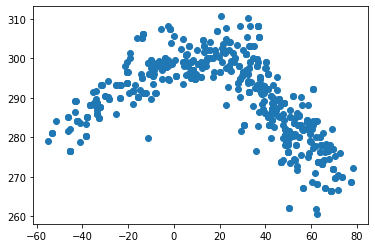

In [89]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp'])

#### Latitude vs. Humidity Plot

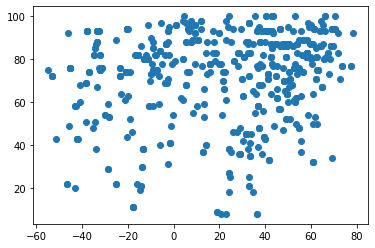

In [90]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'])

#### Latitude vs. Cloudiness Plot

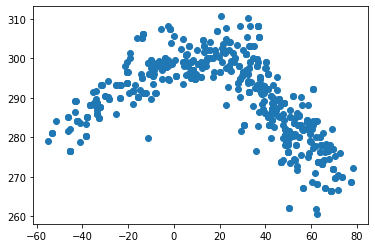

In [91]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp'])

#### Latitude vs. Wind Speed Plot

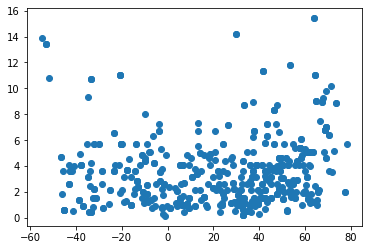

In [92]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'])